# 5.2. Multiclass Classification - Wine Dataset
* "시작하세요! 텐서플로우 2.0 프로그래밍", 5.2. 다항 분류, pp.123-129

## Wine Dataset
Wine Data Set - UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

* [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
* [winequality-white.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

각 항목은 콤마 ,가 아닌 ;으로 구별됩니다.

## 문제
와인의 품질 (Quality)을 분류합니다.

## 데이터 준비 과정

In [1]:
import pandas as pd

red_wine_raw_df = pd.read_csv( 'dataset/winequality-red.csv', sep=';' )
white_wine_raw_df = pd.read_csv( 'dataset/winequality-white.csv', sep=';' )
wine_raw_df = pd.concat( [red_wine_raw_df, white_wine_raw_df] )

In [2]:
wine_raw_df['quality'].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [3]:
wine_raw_df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

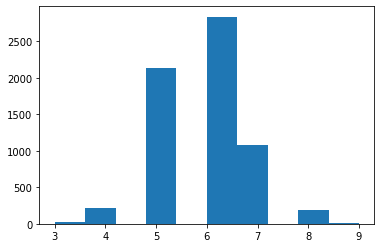

In [4]:
import matplotlib.pyplot as plt

plt.hist( wine_raw_df['quality'] )

## 분류 기준 재설정
와인의 질이 3~9까지 있지만, 데이터의 개수가 너무 적은 레벨은 데이터 불균형 문제 (Data Imbalance Problem)로 분류가 어렵습니다. 어느 정도 데이터의 균형을 맞추기 위해서 와인의 질을 
* 상 (좋음) → 2
* 중 (보통) → 1
* 하 (나쁨) → 0

세 가지로 분류해봅니다.

In [5]:
wine_raw_df.loc[ wine_raw_df['quality'] <=5, 'new_quality' ] = 0
wine_raw_df.loc[ wine_raw_df['quality'] ==6, 'new_quality' ] = 1
wine_raw_df.loc[ wine_raw_df['quality'] >=7, 'new_quality' ] = 2

([<matplotlib.axis.XTick at 0x7fbc05ebae10>,
 <a list of 3 Text major ticklabel objects>)

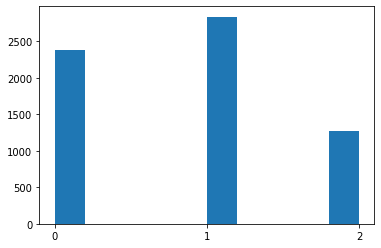

In [6]:
plt.hist( wine_raw_df[ 'new_quality' ] )
plt.xticks( [0,1,2] )

완벽히 균형이 잡히지는 않았지만 3~9로 구분하는 것보다는 데이터 균형이 맞게 되었습니다. 추가로 균형을 맞추는 Undersampling, Upsampling 기법을 적용하지 않고 이 기준으로 분류해봅니다.

In [7]:
wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  new_quality           6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [9]:
temp_wine_df = wine_raw_df.drop( 'quality', 1 )

In [10]:
temp_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  new_quality           6497 non-null   float64
dtypes: float64(12)
memory usage: 659.9 KB


## 모델링 과정

### 정규화 (Normalization)

In [11]:
w = temp_wine_df
normalized_w = ( w - w.min() ) / ( w.max() - w.min() )

### 데이터 골고루 섞어주기

In [12]:
shuffuled_w = normalized_w.sample( frac=1 )

wine_df = shuffuled_w
wine_np = wine_df.to_numpy()

### Training용 데이터와 Test용 데이터 나누기

In [13]:
train_test_ratio = 0.8

train_index = int( len( wine_np) * train_test_ratio )
train_x, train_y = wine_np[:train_index, :-1], wine_np[:train_index, -1]
test_x, test_y = wine_np[train_index:, :-1], wine_np[train_index:, -1]

### 모델 출력형식에 맞게 Target값을 One-Hot Encoding

In [14]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [15]:
train_y = tf.keras.utils.to_categorical( train_y, num_classes=3 )
test_y = tf.keras.utils.to_categorical( test_y, num_classes=3 )

In [16]:
len( train_x )

5197

### 모델 정의

In [19]:
model = tf.keras.Sequential([
#  tf.keras.layers.Dense( units=48, activation='relu', input_shape=(12,) ),
  tf.keras.layers.Dense( units=48, activation='relu', input_shape=(11,) ),
  tf.keras.layers.Dense( units=24, activation='relu' ),
  tf.keras.layers.Dense( units=12, activation='relu' ),
  tf.keras.layers.Dense( units=3, activation='softmax' )
])
model.compile( optimizer=tf.keras.optimizers.Adam( lr=0.07 ), loss='categorical_crossentropy', metrics=['accuracy'] )

### 모델 훈련

In [20]:
history = model.fit( train_x, train_y, epochs=100, batch_size=32, validation_split=0.25 )

Train on 3897 samples, validate on 1300 samples
Epoch 1/100
3897/3897 [==============================] - 1s 169us/sample - loss: 0.4901 - accuracy: 0.7919 - val_loss: 0.4687 - val_accuracy: 0.8085
Epoch 2/100
3897/3897 [==============================] - 0s 52us/sample - loss: 0.4417 - accuracy: 0.7880 - val_loss: 0.4785 - val_accuracy: 0.8085
Epoch 3/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.4255 - accuracy: 0.8032 - val_loss: 0.4032 - val_accuracy: 0.8085
Epoch 4/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.4321 - accuracy: 0.7911 - val_loss: 0.4693 - val_accuracy: 0.7715
Epoch 5/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.4286 - accuracy: 0.7911 - val_loss: 0.4025 - val_accuracy: 0.8085
Epoch 6/100
3897/3897 [==============================] - 0s 61us/sample - loss: 0.4254 - accuracy: 0.7911 - val_loss: 0.3988 - val_accuracy: 0.8085
Epoch 7/100
3897/3897 [==============================] - 0s 60u

## 결과 시각화

In [25]:
def plot_learning_curve( history ):

    import matplotlib.pyplot as plt
    plt.figure( figsize=(12,4) )

    plt.subplot( 1,2,1 )
    plt.plot( history.history['loss'], 'b-', label='loss' )
    plt.plot( history.history['val_loss'], 'r--', label='val_loss' )
    plt.xlabel( 'Epoch' )
    plt.legend()

    plt.subplot( 1, 2, 2 )
    plt.plot( history.history['accuracy'], 'g-', label='accuracy' )
    plt.plot( history.history['val_accuracy'], 'k--', label='val_accuracy' )
    plt.xlabel( 'Epoch' )
    plt.ylim( 0.7, 1 )
    plt.legend()

    plt.show()

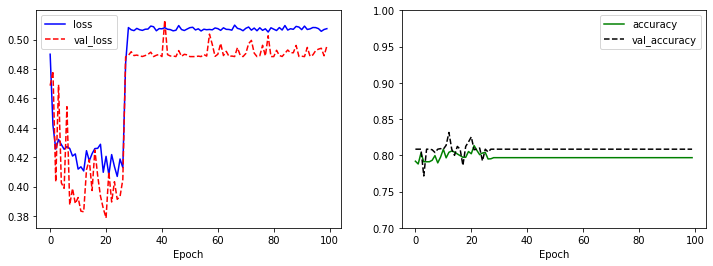

In [26]:
plot_learning_curve( history )

In [22]:
model.evaluate( test_x, test_y )

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4841621074309716, 0.81846154]

In [24]:
len( test_x )

1300

1300개의 test dataset에 대해 0.8185의 accuracy를 달성. 결과가 그렇게 좋지 않기 때문에 

Train on 3897 samples, validate on 1300 samples
Epoch 1/100
3897/3897 [==============================] - 1s 168us/sample - loss: 0.5070 - accuracy: 0.7968 - val_loss: 0.4885 - val_accuracy: 0.8085
Epoch 2/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.5067 - accuracy: 0.7968 - val_loss: 0.4890 - val_accuracy: 0.8085
Epoch 3/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.5070 - accuracy: 0.7968 - val_loss: 0.4897 - val_accuracy: 0.8085
Epoch 4/100
3897/3897 [==============================] - 0s 55us/sample - loss: 0.5068 - accuracy: 0.7968 - val_loss: 0.4887 - val_accuracy: 0.8085
Epoch 5/100
3897/3897 [==============================] - 0s 58us/sample - loss: 0.5063 - accuracy: 0.7968 - val_loss: 0.4886 - val_accuracy: 0.8085
Epoch 6/100
3897/3897 [==============================] - 0s 53us/sample - loss: 0.5067 - accuracy: 0.7968 - val_loss: 0.4910 - val_accuracy: 0.8085
Epoch 7/100
3897/3897 [==============================] - 0s 56u

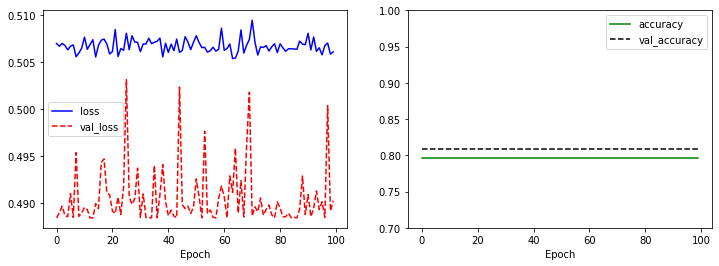

In [29]:
model.compile( optimizer=tf.keras.optimizers.Adam( lr=0.05 ), loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit( train_x, train_y, epochs=100, batch_size=32, validation_split=0.25 )
plot_learning_curve( history )

In [30]:
model.evaluate( test_x, test_y )

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4773846226472121, 0.81846154]

학습이 잘 되지 않았으나, 정확도가 0.8185임.